In [1]:
import numpy as np
import os
import sys
import random
import torch
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path+"/models")
sys.path.append(module_path+"/train")
sys.path.append(module_path+"/datasets")

from datasets import train_test_random_split, load_dsprites, CustomDSpritesDataset
from entanglement_metric import entanglement_metric_factor_vae, entanglement_metric_beta_vae
from utils import latent_transversal
from beta_vae import Classifier
from factor_vae import Discriminator
from train import test_beta_vae, test_factor_vae, test_control_vae

In [2]:
seed = 2

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device.type

'cpu'

In [4]:
dataset = load_dsprites("../datasets/dsprites.npz",False)

In [5]:
data_ = CustomDSpritesDataset(dataset,seed=seed)

In [6]:
data_train, data_test = train_test_random_split(data_,0.8, seed=seed)

In [7]:
batch_size=64
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=False)

In [8]:
model_names = [f for f in os.listdir('trained_models') if f[-4:] =='.dat' and not 'factor' in f and not "alldata" in f]
model_names

['betavae_beta4_e50_n.dat',
 'betavae_beta1_e50_n.dat',
 'controlvae_epoch50_lr1e2_Cmax10.dat',
 'controlvae_epoch50_lr1e2_Cmax8.dat',
 'controlvae_epoch50_lr1e2_Cmax12.dat']

In [9]:
def plot_loss(loss_lists, title):
    if not isinstance(loss_lists[0], list):
        loss_lists = [loss_lists]
    for loss_list in loss_lists:
        plt.plot(np.arange(1,len(loss_list)+1, 1), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training "+title)
    plt.show()

model 1: betavae_beta4_e50_n.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 58.94386829601394
accuracies : [0.8240000000000001, 0.8160000000000001, 0.8240000000000001, 0.796, 0.804]
[[[  0.    0.    0.    2.8   0.    0. ]
  [  0.    0.    0.    0.4   0.    0. ]
  [  0.    0.2   0.    2.4   0.    0. ]
  [  0.   75.    0.   55.4   0.    0. ]
  [  0.    0.    0.    3.2   0.    0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.   26.2  93.6   0.6   0.    0. ]
  [  0.    3.8   0.    2.4   0.  103. ]
  [  0.    0.4   0.    1.4  95.6   0. ]
  [  0.    0.2   0.2  29.2   2.8   0. ]]]
Factor Vae metric: 
Accuracy: 0.8128
Beta Vae metric: 
Accuracy: 0.69


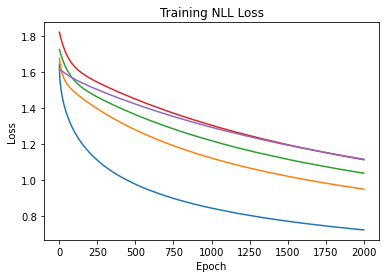

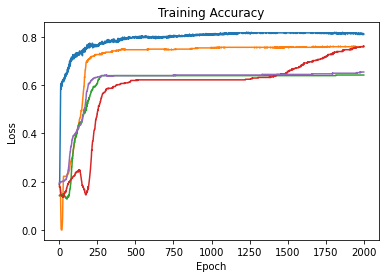

model 2: betavae_beta1_e50_n.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 32.38683055837949
accuracies : [0.612, 0.616, 0.648, 0.608, 0.618]
[[[ 0.   3.4  0.4 23.6 25.8  0. ]
  [ 0.   1.2  1.4  2.4  0.   0. ]
  [ 0.  36.2  4.4 17.   0.2  0. ]
  [ 0.   2.2  1.6  2.2  0.   0. ]
  [ 0.  25.6  4.4  8.8 24.6 98. ]
  [ 0.  12.8  1.2 11.6  3.6  0. ]
  [ 0.   6.6  2.6  8.2 29.4  4.8]
  [ 0.  13.  77.   6.   0.6  0.2]
  [ 0.   3.4  0.  12.  14.   0. ]
  [ 0.   1.4  0.8  7.2  0.2  0. ]]]
Factor Vae metric: 
Accuracy: 0.6204
Beta Vae metric: 
Accuracy: 0.532


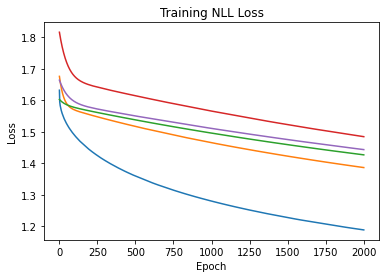

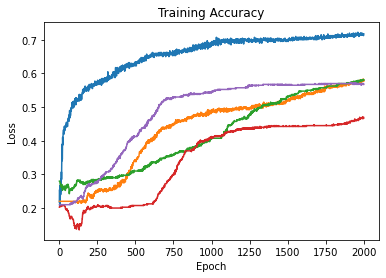

model 3: controlvae_epoch50_lr1e2_Cmax10.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 28.296301390561794
accuracies : [0.774, 0.76, 0.808, 0.786, 0.782]
[[[  0.    0.    0.    4.6   0.  103. ]
  [  0.   75.2   0.   74.2   0.    0. ]
  [  0.    0.    0.    2.8   0.    0. ]
  [  0.   30.6  93.8   2.2   0.    0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.    0.    0.    1.8  98.4   0. ]
  [  0.    0.    0.    0.6   0.    0. ]
  [  0.    0.    0.    5.    0.    0. ]
  [  0.    0.    0.    0.8   0.    0. ]
  [  0.    0.    0.    5.8   0.    0. ]]]
Factor Vae metric: 
Accuracy: 0.782
Beta Vae metric: 
Accuracy: 0.7860000000000001


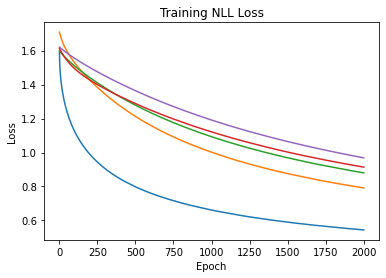

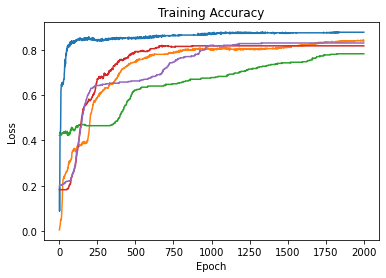

model 4: controlvae_epoch50_lr1e2_Cmax8.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 31.45156153291464
accuracies : [0.804, 0.784, 0.836, 0.794, 0.804]
[[[  0.    0.    0.    3.    0.  103. ]
  [  0.   75.2   1.8  56.6   0.    0. ]
  [  0.    0.    0.    2.4   0.    0. ]
  [  0.   30.6  92.    2.8   0.    0. ]
  [  0.    0.    0.    2.    0.    0. ]
  [  0.    0.    0.    3.   98.4   0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.    0.    0.   16.6   0.    0. ]
  [  0.    0.    0.    3.4   0.    0. ]
  [  0.    0.    0.    8.    0.    0. ]]]
Factor Vae metric: 
Accuracy: 0.8044
Beta Vae metric: 
Accuracy: 0.784


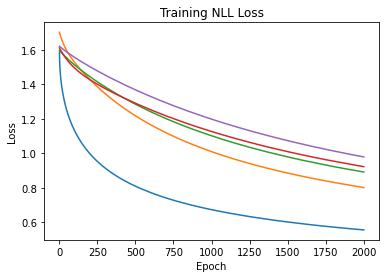

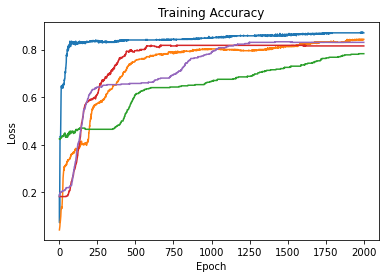

model 5: controlvae_epoch50_lr1e2_Cmax12.dat


/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/Users/ireneburger/opt/anaconda3/envs/atml/lib/python3.8/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Reconstruction loss: 28.296534705493187
accuracies : [0.774, 0.76, 0.808, 0.786, 0.784]
[[[  0.    0.    0.    4.4   0.  103. ]
  [  0.   75.2   0.   74.2   0.    0. ]
  [  0.    0.    0.    3.2   0.    0. ]
  [  0.   30.6  93.8   2.2   0.    0. ]
  [  0.    0.    0.    1.4   0.    0. ]
  [  0.    0.    0.    1.8  98.4   0. ]
  [  0.    0.    0.    0.6   0.    0. ]
  [  0.    0.    0.    4.4   0.    0. ]
  [  0.    0.    0.    1.2   0.    0. ]
  [  0.    0.    0.    5.6   0.    0. ]]]
Factor Vae metric: 
Accuracy: 0.7824
Beta Vae metric: 
Accuracy: 0.7860000000000001


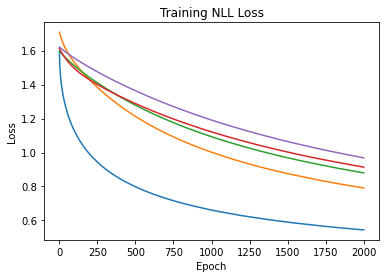

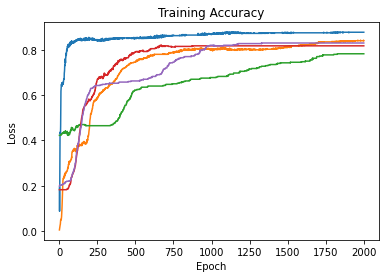

In [10]:
i=1
for name in model_names:
    model = torch.load('trained_models/'+name, map_location=device)
    print("model "+str(i)+": "+name)
    if name[0]=="b":
        recon_loss = test_beta_vae(model, test_loader,0, 'bernoulli', device=device)
    elif name[0]=="c":
        recon_loss = test_control_vae(model, test_loader, 'bernoulli', device=device)
    else:
        discriminator = Discriminator()
        recon_loss = test_factor_vae(model,discriminator, test_loader,0, 'bernoulli', device=device)
    print("Reconstruction loss: "+str(recon_loss))
    loss = entanglement_metric_factor_vae(model, data_, 500, 200, random_seeds=5, device = device,seed=seed)
    print("Factor Vae metric: ")
    print("Accuracy: "+str(1-loss))
    print("Beta Vae metric: ")
    torch.manual_seed(seed)
    classifier = Classifier()
    classifier.to(device)
    optimizer = torch.optim.Adagrad(classifier.parameters(), lr=1e-2)
    train_losses, train_accuracies, test_accuracy = entanglement_metric_beta_vae(model, classifier, optimizer, 2000,  data_, 500, 50, random_seeds=5, device = device,seed=seed)
    print("Accuracy: "+str(test_accuracy))
    plot_loss(train_losses, "NLL Loss")
    plot_loss(train_accuracies, "Accuracy")
    i+=1

In [ ]:
print(data_.factors_names)

In [ ]:
imgs = latent_transversal(model0,data_[10][0].float(),-3,3,10,7)

In [ ]:
for img in imgs:
    plt.imshow(torch.sigmoid(img.squeeze().detach()), cmap='Greys_r')
    plt.title("")
    plt.show()